# House Prices: Advanced Regression Techniques

## Outline:

#### 1. Introduction 
#### 2. Importing Data
#### 3. Data Cleaning and Data Analysis 
#### 4. Inferential Satistics 
#### 5. Macine Learning 

## 1. Introduction 

The following dataset, Ames Housing dataset was compiled by Dean De Cock, it is a modernized and expanded version of the Boston Housing Dataset. It can be found from Kaggle, https://www.kaggle.com/c/house-prices-advanced-regression-techniques/overview. 

The objective of this Capstone project is to predict the sale price of each house in correlation to its features. There are a total of 79 explanatory describing almost every aspect of residential homes in the Ames area. This will be accomplished through advanced regression techniques. Buyers in the real estate industry can use this tool to find the features they are looking for in a house and match it with a price. Sellers in the real estate industry can use this to determine the cost of their home and identify which features have a bigger impact on the sale price.

## 2. Importing  Data

In [126]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import statistics
from scipy import stats


In [127]:
train_df = pd.read_csv('data/train.csv')

## 3. Data Cleaning and Data Analysis 

In [128]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [129]:
#  From the columns that have missing data, only one of the columns “LotFrontage” was a float64 thus all the missing data was filled with a mean value
train_df.fillna(train_df.mean(), inplace=True)

In [130]:
# For the columns that have a object data type, 'NaN' was replaced with 'Not Available'
train_df.fillna('Not Available', inplace=True)

In [131]:
null_columns = train_df.columns[train_df.isnull().any()]
train_df[null_columns].isnull().sum()

Series([], dtype: float64)

In [132]:
# Drop the column 'Id' 
train_df.drop('Id', axis = 1, inplace=True)

In [133]:
pd.options.display.max_columns = None
display(train_df)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Not Available,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Not Available,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,Not Available,Not Available,Not Available,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Not Available,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,Not Available,Not Available,Not Available,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,Not Available,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,Not Available,Not Available,Not Available,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,Not Available,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,Not Available,Not Available,Not Available,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,Not Available,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,Not Available,Not Available,Not Available,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,Not Available,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,Not Available,Not Available,Not Available,0,8,2007,WD,Normal,175000
1456,20,RL,85.0,13175,Pave,Not Available,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,Not Available,MnPrv,Not Available,0,2,2010,WD,Normal,210000
1457,70,RL,66.0,9042,Pave,Not Available,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1

In [134]:
# All of the columns that had a negative correlation to the sale price were deleted as they were not relevant in determining the sales price.
train_df.drop(['BsmtFinSF2', 'Alley', 'PoolQC', 'Fence', 'MiscFeature', 'LowQualFinSF', 'BsmtHalfBath', 'EnclosedPorch', 'MSSubClass', 'OverallCond', 'KitchenAbvGr', 'YrSold', 'MiscVal'], axis = 1, inplace = True, errors = 'ignore')

In [135]:
# Finding the correlation coefficient of the saleprice relative to the given data 
saleprice_corr = train_df.corr()['SalePrice'].sort_values(ascending=False)
print(saleprice_corr)

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
MasVnrArea      0.475241
GarageYrBlt     0.470177
Fireplaces      0.466929
BsmtFinSF1      0.386420
LotFrontage     0.334901
WoodDeckSF      0.324413
2ndFlrSF        0.319334
OpenPorchSF     0.315856
HalfBath        0.284108
LotArea         0.263843
BsmtFullBath    0.227122
BsmtUnfSF       0.214479
BedroomAbvGr    0.168213
ScreenPorch     0.111447
PoolArea        0.092404
MoSold          0.046432
3SsnPorch       0.044584
Name: SalePrice, dtype: float64


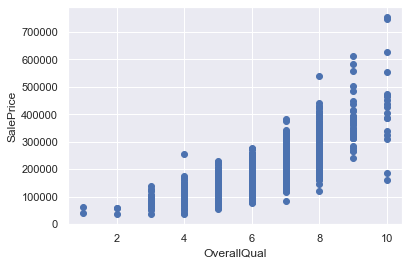

In [136]:
plt.xlabel('OverallQual')
plt.ylabel('SalePrice')
plt.scatter(train_df['OverallQual'],train_df['SalePrice'])

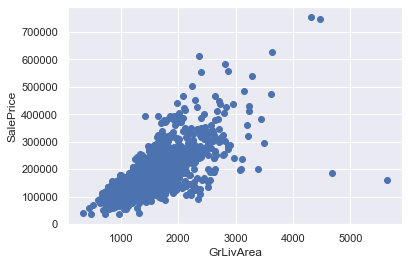

In [137]:
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.scatter(train_df['GrLivArea'],train_df['SalePrice'])

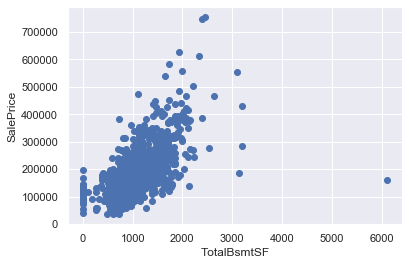

In [138]:
plt.xlabel('TotalBsmtSF')
plt.ylabel('SalePrice')
plt.scatter(train_df['TotalBsmtSF'], train_df['SalePrice'])

In [139]:
# Detecting potential outliers between a Z-score of -3.5 or 3.5
from scipy.stats import zscore
train_df["GrLivingArea_zscore"] = zscore(train_df['GrLivArea'])
train_df["is_outlier"] = train_df["GrLivingArea_zscore"].apply(
  lambda x: x <= -3.5 or x >= 3.5
)
train_df[train_df["is_outlier"]]

,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,3SsnPorch,ScreenPorch,PoolArea,MoSold,SaleType,SaleCondition,SalePrice,GrLivingArea_zscore,is_outlier
185,RM,90.000000,22950,Pave,IR2,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,2.5Fin,10,1892,1993,Gable,WdShngl,Wd Sdng,Wd Sdng,None,0.0,Gd,Gd,BrkTil,TA,TA,Mn,Unf,0,Unf,1107,1107,GasA,Ex,Y,SBrkr,1518,1518,3608,0,2,1,4,Ex,12,Typ,2,TA,Detchd,1993.000000,Unf,3,840,Ex,TA,Y,0,260,0,410,0,6,WD,Normal,475000,3.983504,True
304,RM,87.000000,18386,Pave,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,2.5Fin,7,1880,2002,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,1470,1470,GasA,Ex,Y,SBrkr,1675,1818,3493,0,3,0,3,Gd,10,Typ,1,Ex,Attchd,2003.000000,Unf,3,870,TA,TA,Y,302,0,0,0,0,5,WD,Normal,295000,3.764582,True
523,RL,130.000000,40094,Pave,IR1,Bnk,AllPub,Inside,Gtl,Edwards,PosN,PosN,1Fam,2Story,10,2007,2008,Hip,CompShg,CemntBd,CmentBd,Stone,762.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,2260,Unf,878,3138,GasA,Ex,Y,SBrkr,3138,1538,4676,1,3,1,3,Ex,11,Typ,1,Gd,BuiltIn,2007.000000,Fin,3,884,TA,TA,Y,208,406,0,0,0,10,New,Partial,184750,6.016627,True
635,RH,60.000000,10896,Pave,Reg,Bnk,AllPub,Inside,Gtl,SWISU,Feedr,Norm,2fmCon,2.5Fin,6,1914,1995,Hip,CompShg,VinylSd,VinylSd,None,0.0,Fa,TA,CBlock,TA,Fa,No,LwQ,256,Unf,1184,1440,GasA,Ex,Y,FuseA,1440,1440,3395,0,2,0,8,Fa,14,Typ,0,Not Available,Not Available,1978.506164,Not Available,0,0,Not Available,Not Available,N,0,110,0,0,0,3,WD,Abnorml,200000,3.578022,True
691,RL,104.000000,21535,Pave,IR1,Lvl,AllPub,Corner,Gtl,NoRidge,Norm,Norm,1Fam,2Story,10,1994,1995,Gable,WdShngl,HdBoard,HdBoard,BrkFace,1170.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,1455,Unf,989,2444,GasA,Ex,Y,SBrkr,2444,1872,4316,0,3,1,4,Ex,10,Typ,2,Ex,Attchd,1994.000000,Fin,3,832,TA,TA,Y,382,50,0,0,0,1,WD,Normal,755000,5.331304,True
1169,RL,118.000000,35760,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,NoRidge,Norm,Norm,1Fam,2Story,10,1995,1996,Hip,CompShg,HdBoard,HdBoard,BrkFace,1378.0,Gd,Gd,PConc,Ex,TA,Gd,GLQ,1387,Unf,543,1930,GasA,Ex,Y,SBrkr,1831,1796,3627,1,3,1,4,Gd,10,Typ,1,TA,Attchd,1995.000000,Fin,3,807,TA,TA,Y,361,76,0,0,0,7,WD,Normal,625000,4.019674,True
1182,RL,160.000000,15623,Pave,IR1,Lvl,AllPub,Corner,Gtl,NoRidge,Norm,Norm,1Fam,2Story,10,1996,1996,Hip,CompShg,Wd Sdng,ImStucc,None,0.0,Gd,TA,PConc,Ex,TA,Av,GLQ,2096,Unf,300,2396,GasA,Ex,Y,SBrkr,2411,2065,4476,1,3,1,4,Ex,10,Typ,2,TA,Attchd,1996.000000,Fin,3,813,TA,TA,Y,171,78,0,0,555,7,WD,Abnorml,745000,5.635892,True
1268,RL,70.049958,14100,Pave,IR1,Lvl,AllPub,Inside,Mod,Crawfor,Norm,Norm,1Fam,1.5Fin,8,1935,1997,Gable,CompShg,Stucco,Stucco,BrkFace,632.0,TA,Gd,CBlock,TA,TA,Mn,Rec,192,Unf,536,728,GasA,Ex,Y,SBrkr,1968,1479,3447,0,3,1,4,Gd,11,Typ,2,Gd,BuiltIn,1982.000000,Unf,3,1014,TA,TA,Y,314,12,0,0,0,5,WD,Normal,381000,3.677013,True
1298,RL,313.000000,63887,Pave,IR3,Bnk,AllPub,Corner,Gtl,Edwards,Feedr,Norm,1Fam,2Story,10,2008,2008,Hip,ClyTile,Stucco,Stucco,Stone,796.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,5644,Unf,466,6110,GasA,Ex,Y,SBrkr,4692,950,5642,2,2,1,3,Ex,12,Typ,3,Gd,Attchd,2008.000000,Fin,2,1418,TA,TA,Y,214,292,0,0,480,1,New,Partial,160000,7.855574,True


In [140]:
train_df['SalePrice'].value_counts()

140000    20
135000    17
145000    14
155000    14
190000    13
          ..
84900      1
424870     1
415298     1
62383      1
34900      1
Name: SalePrice, Length: 663, dtype: int64

In [141]:
print('The lowest sale price of a house is', min(train_df['SalePrice']))
print('The highest sale price of a house is',max(train_df['SalePrice']))
x= statistics.mean(train_df['SalePrice'])
print('The average sale price of a house is', x)

The lowest sale price of a house is 34900
The highest sale price of a house is 755000
The average sale price of a house is 180921.19589041095


In [142]:
# Drop outliers, 2 of the largest outliers 
train_df.drop(train_df.index[[523, 1298]], inplace = True)

There are a total of 9 outliers with a deviation that is greater than 3.5 or less than -3.5. Out of the 9 outliers there are two that are far greater outliers than the others with a deviation of 6.01 and 7.86. In the graph above the two significant outliers are the two points located on the bottom right, these two points are significantly away from the rest of the data. Thus both points are removed. 

(array([  5.,   6.,  11.,  27.,  50.,  49.,  98., 134., 148., 125., 106.,
        111., 105.,  70.,  53.,  51.,  48.,  45.,  31.,  27.,  28.,  14.,
         13.,  22.,  11.,  13.,   4.,   6.,   9.,   8.,   5.,   3.,   4.,
          3.,   2.,   2.,   1.,   1.,   1.,   0.,   0.,   1.,   0.,   2.,
          0.,   1.,   0.,   0.,   1.,   1.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   2.]),
 array([ 34900.        ,  46901.66666667,  58903.33333333,  70905.        ,
         82906.66666667,  94908.33333333, 106910.        , 118911.66666667,
        130913.33333333, 142915.        , 154916.66666667, 166918.33333333,
        178920.        , 190921.66666667, 202923.33333333, 214925.        ,
        226926.66666667, 238928.33333333, 250930.        , 262931.66666667,
        274933.33333333, 286935.        , 298936.66666667, 310938.33333333,
        322940.        , 334941.66666667, 346943.33333333, 358945.        ,
        370946.66666667, 382948.33333333, 394950.        ,

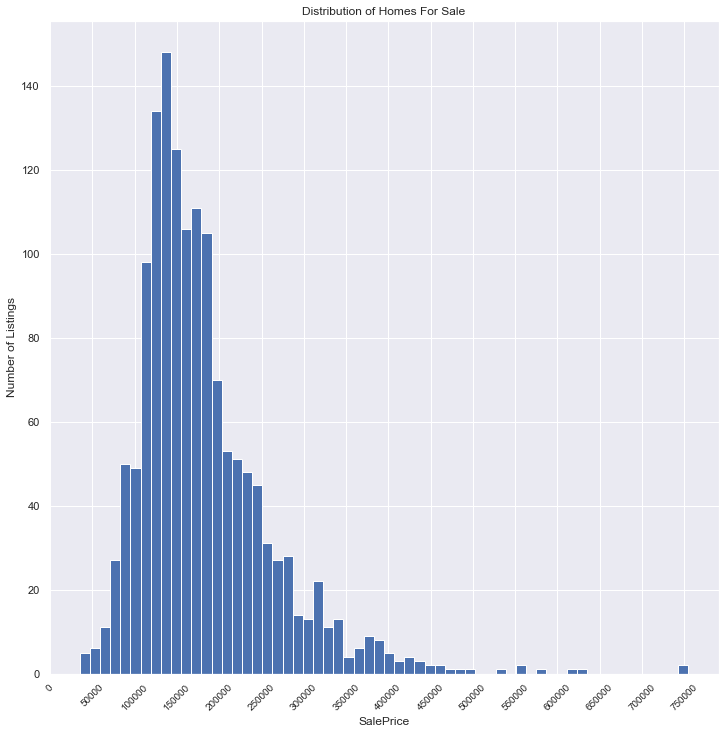

In [143]:
x = train_df['SalePrice']
plt.figure(figsize= (12,12))
plt.xlabel('SalePrice')
plt.ylabel('Number of Listings')
plt.title('Distribution of Homes For Sale')
plt.xticks(np.arange(0,800000,step=50000),rotation=45,fontsize=10)
plt.hist(x, bins=60)

The histogram above shows an overview of the corresponding data set. The lowest sale price of a house is 34, 900 and the highest price is 755, 000. Majority of the sale prices are towards the cheaper side, with an average sale price of 180, 921. There are only a few sales prices that are over 500, 000. 

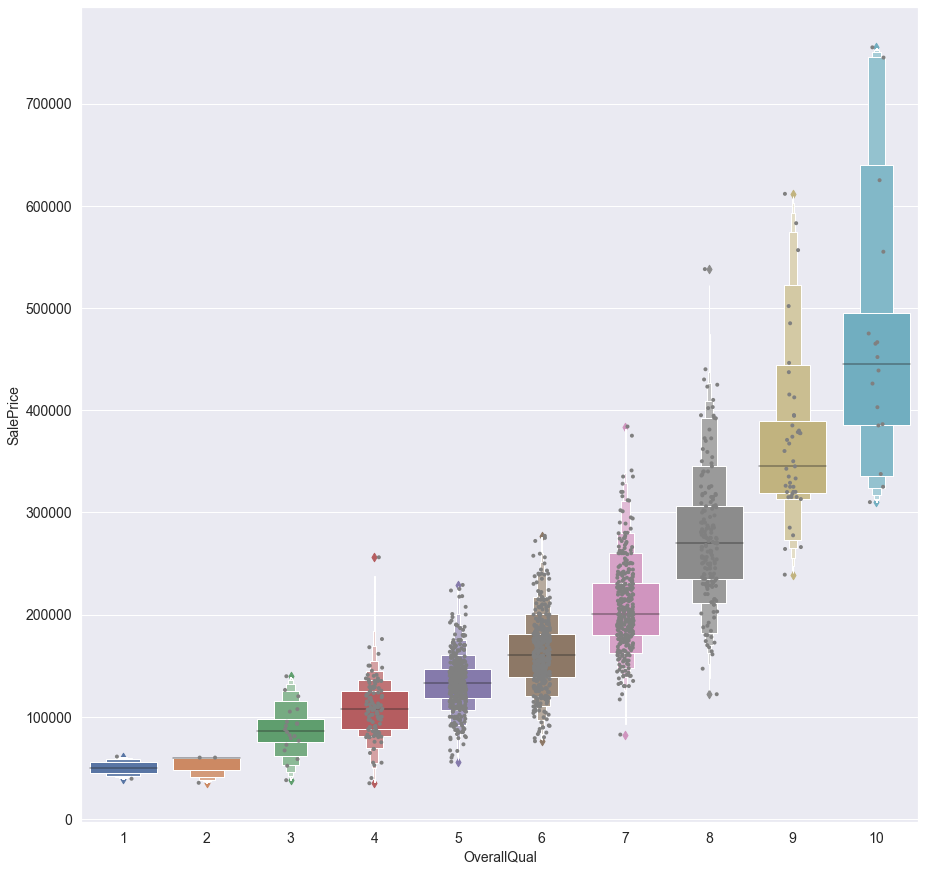

In [144]:
plt.figure(figsize= (15,15))
sns.set()
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('OverallQual',fontsize=14)
plt.ylabel('SalePrice',fontsize=14)
ax = sns.boxenplot(x="OverallQual", y="SalePrice", data=train_df)
ax = sns.stripplot(x="OverallQual", y="SalePrice", data=train_df, size=4, jitter=True, color="gray")

The box plot above shows a plot of the individual sale price of a house versus the overall quality of each house. The gray horizontal line in each box plot represents the average sale price for each overall quality. On average, as the overall quality increases the sale price increases with it. 

<Figure size 1080x1080 with 0 Axes>

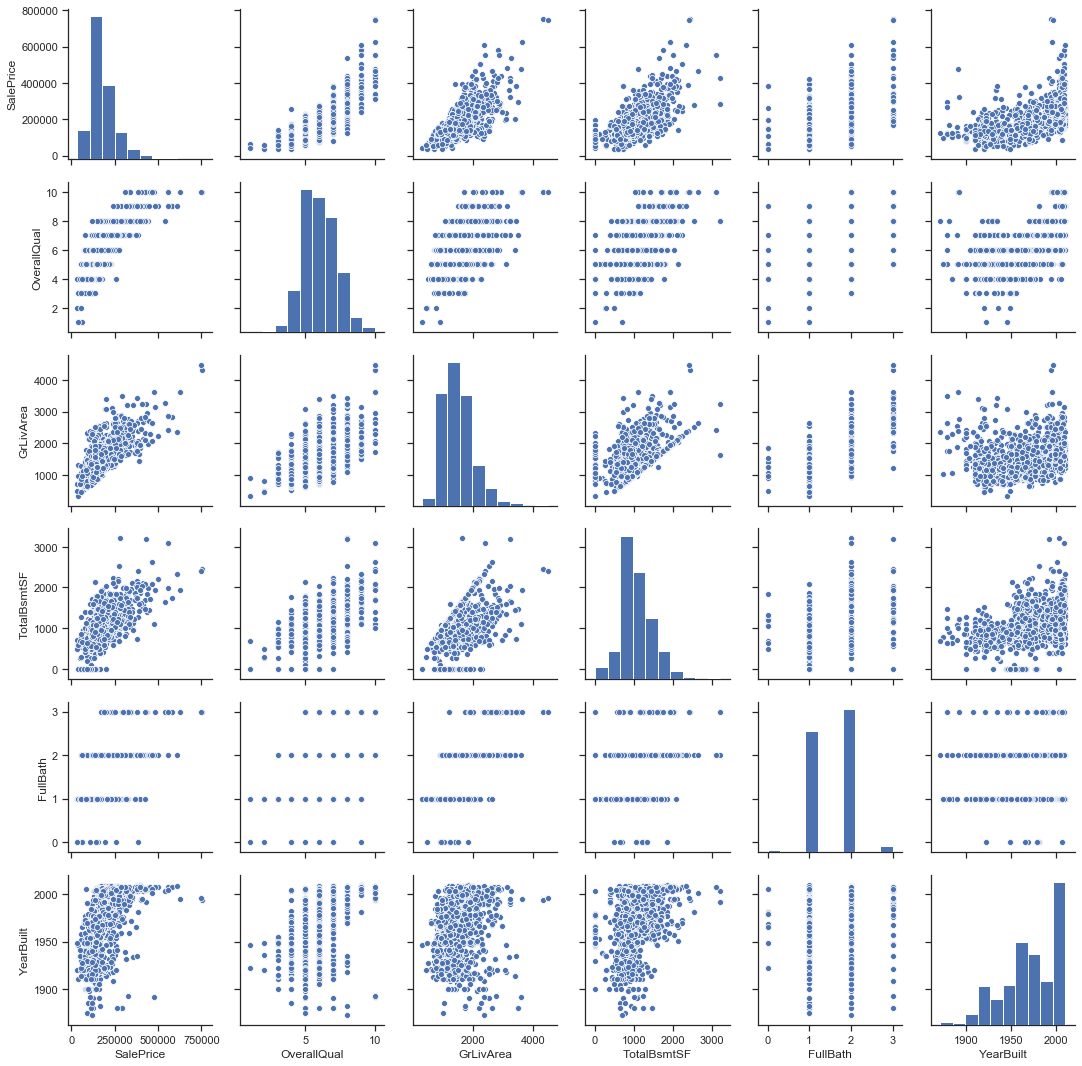

In [145]:
plt.figure(figsize= (15,15))
sns.set(style="ticks", color_codes=True)

g = sns.pairplot(train_df, vars=['SalePrice', 'OverallQual', 'GrLivArea', 'TotalBsmtSF', 'FullBath','YearBuilt'])

The pairplot above shows correlation between the sale price of each house,  the overall quality (OverallQual), above grade living area in square feet (GrLivArea), total square feet of basement area (TotalBsmtSF), full bathrooms above grade (FullBath) and the original construction date (YearBuilt). In the first row it shows the correlation of the sales price towards the other features. Visually there is a linear increase between each feature and the sales price. Several graphs in the pairplot above show linear relationships. 

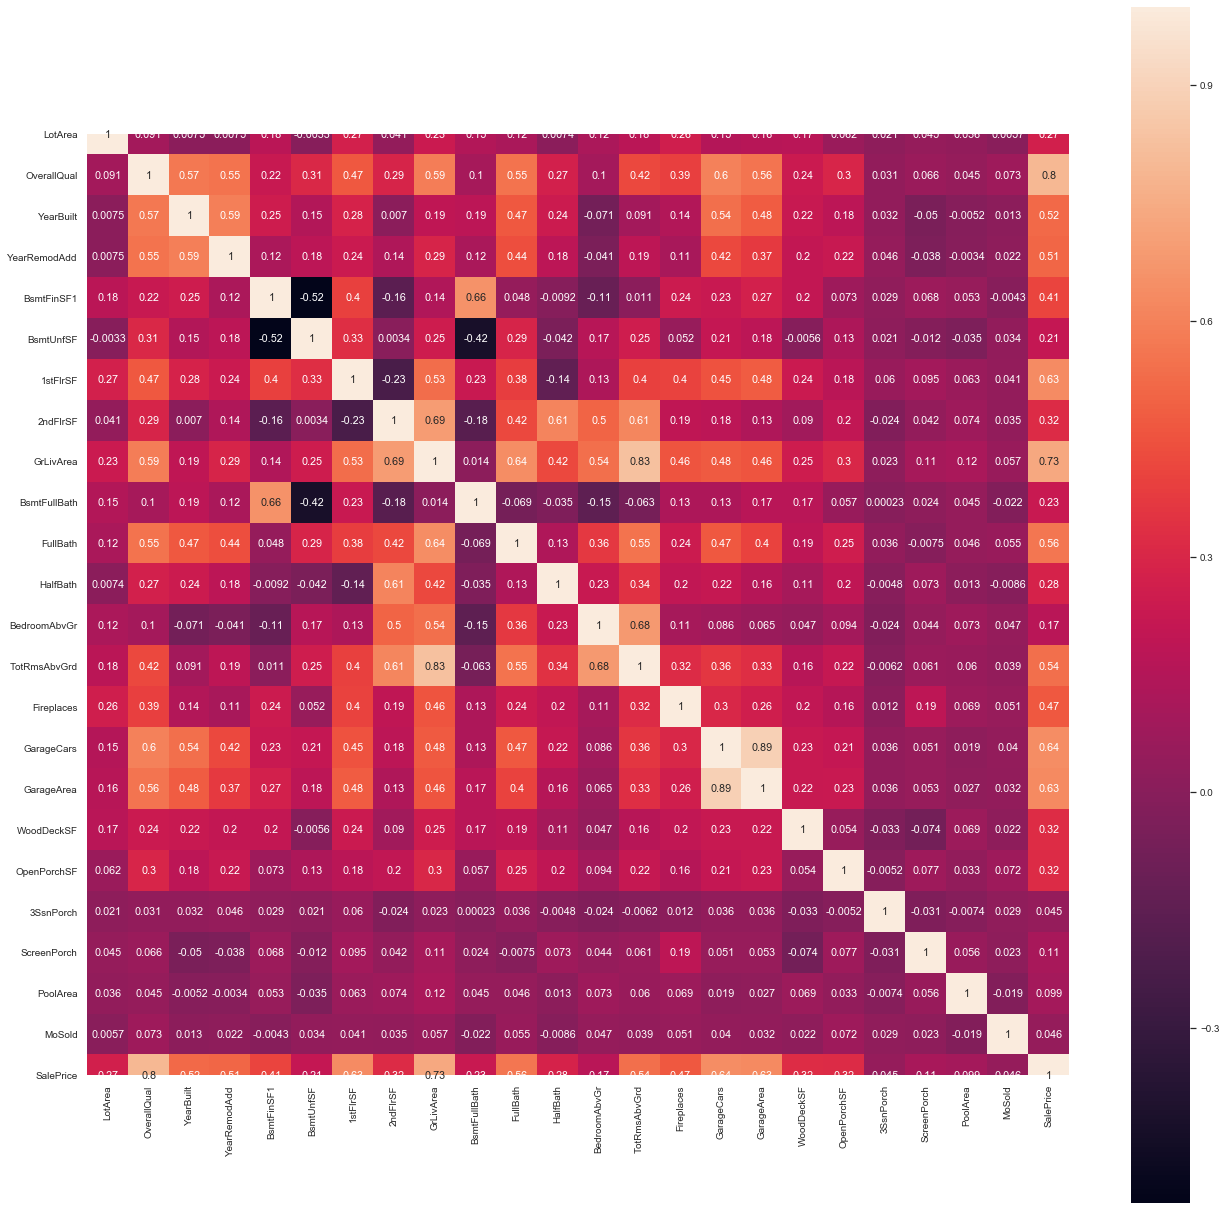

In [146]:
plt.figure(figsize= (22,22))
df = pd.DataFrame(train_df, columns=['LotArea', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtUnfSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MoSold', 'SalePrice'])
sns.set(font_scale=0.9)
sns.heatmap(df.corr(), cbar=True, annot=True, square=True,)

The heat map of a correlation matrix above shows a good representation of the correlation between each feature of the house. The most important is the SalePrice correlation towards the rest of the features with the highest correlation being 0.8 for OverallQual and the lowest at 0.045 for 3SsnPorch. The light red means high correlation and the darker red to black means lower correlation to inverse correlation. 

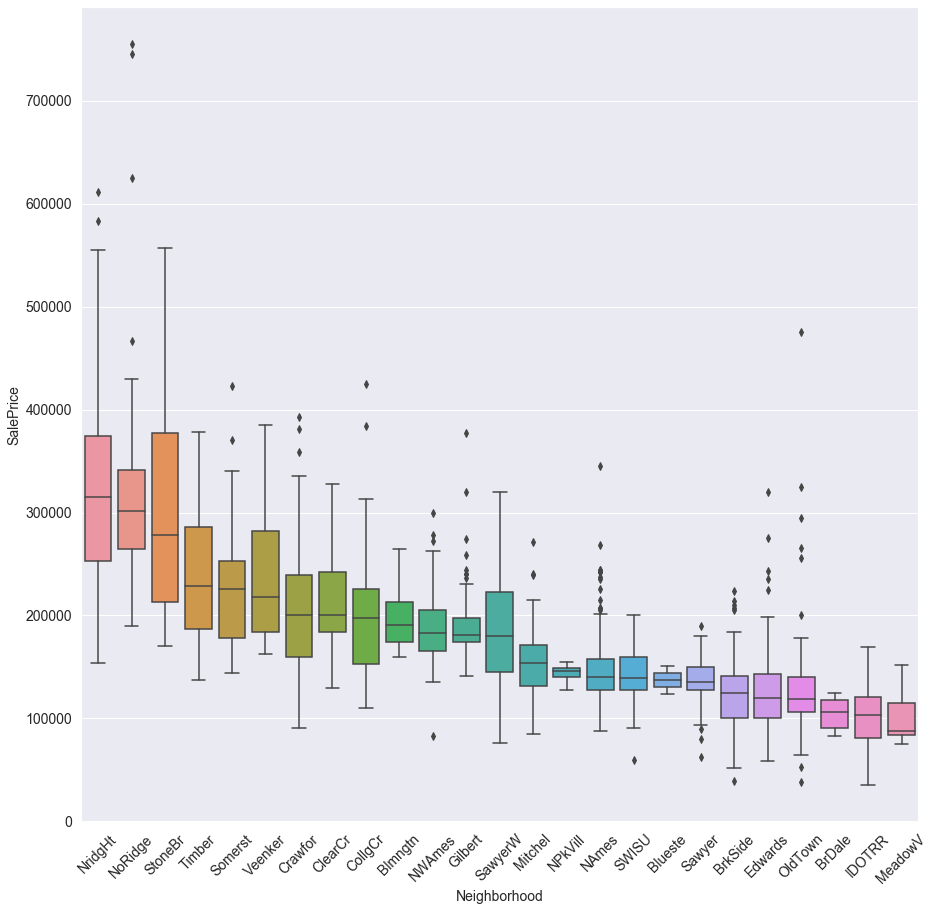

In [147]:
plt.figure(figsize= (15,15))
plt.xticks(rotation=45,fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Neighborhood',fontsize=14)
plt.ylabel('SalePrice',fontsize=14)
my_order = train_df.groupby(by=["Neighborhood"])["SalePrice"].median().sort_values(ascending=False).index
ax = sns.boxplot(x="Neighborhood", y="SalePrice", data=train_df, order=my_order)


The above box plot graph shows the sales prices for each of the neighborhoods in the given data. The neighborhood NridgHt has the highest average sales price. That said, the neighborhood NoRidge has three of the most expensive homes. 

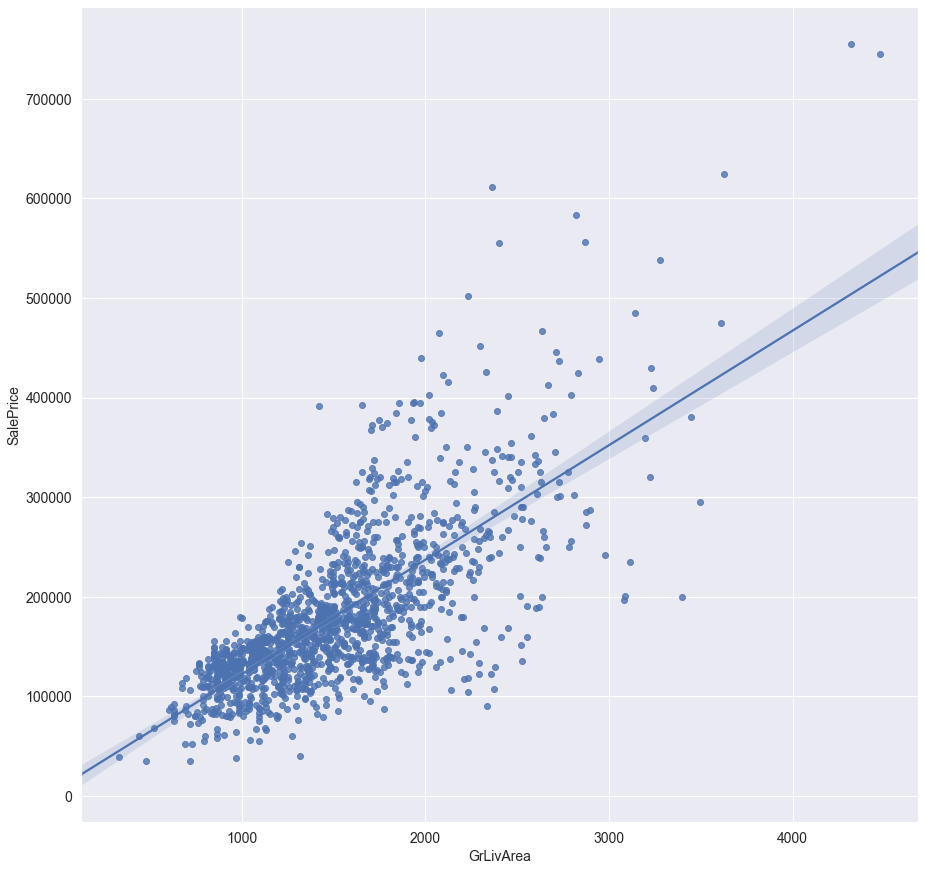

In [148]:
plt.figure(figsize= (15,15))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('GrLivArea',fontsize=14)
plt.ylabel('SalePrice',fontsize=14)
g = sns.regplot(x="GrLivArea", y="SalePrice", data=train_df)

<Figure size 1440x1440 with 0 Axes>

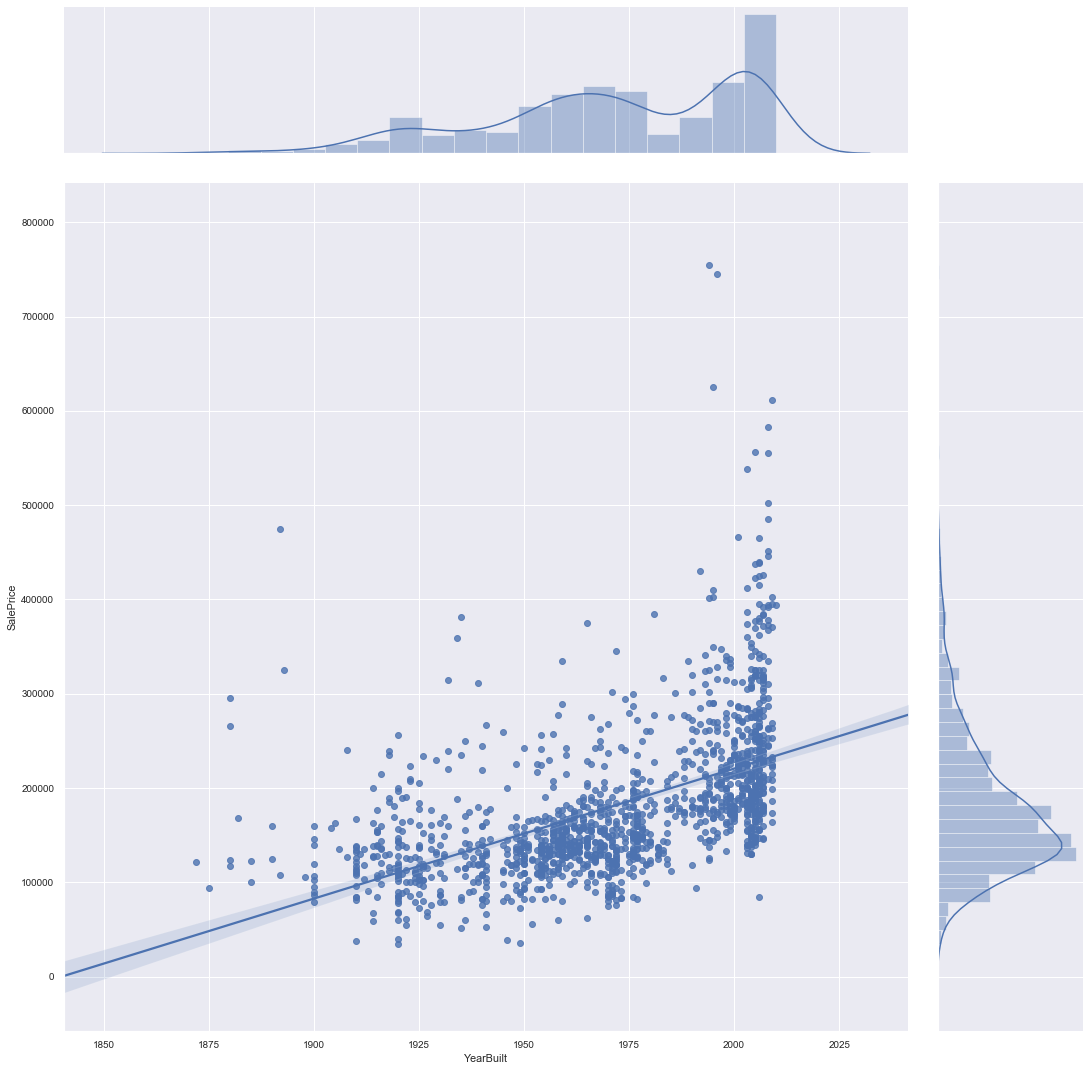

In [149]:
plt.figure(figsize= (20,20))
sns.jointplot(x="YearBuilt", y="SalePrice", data=train_df, kind="reg",height=15)

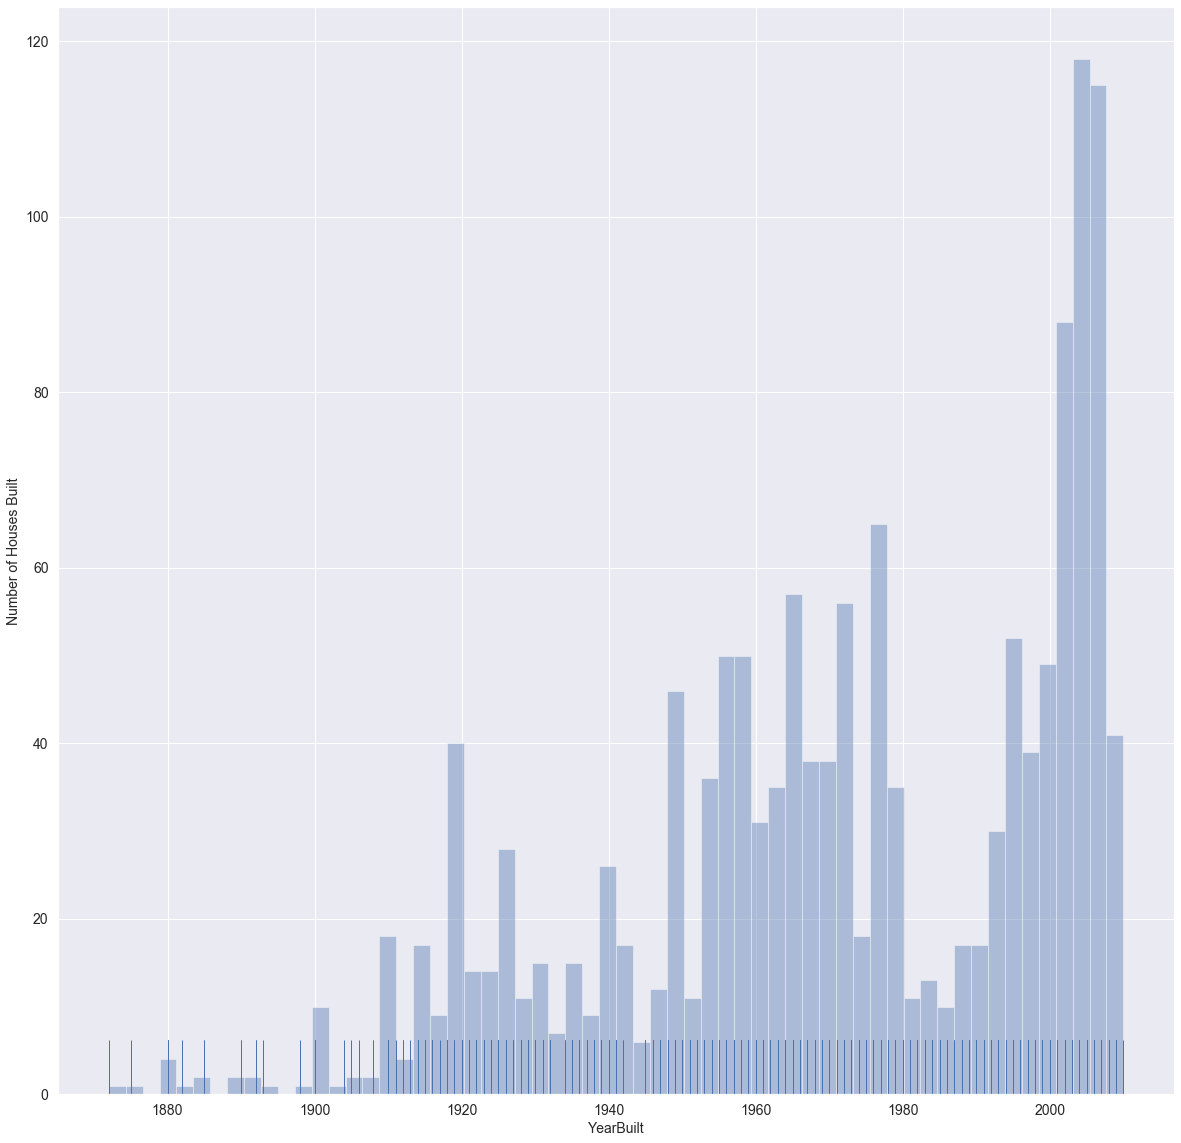

In [150]:
plt.figure(figsize= (20,20))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('YearBuilt',fontsize=14)
plt.ylabel('Number of Houses Built', fontsize=14)
x = train_df['YearBuilt']
sns.distplot(x, kde=False, rug=True, bins=60);

The histograms above show the number of homes built by the year. On average the homes built are increasing every 2 decades. The joint plot of SalePrice Vs. year built shows as increasing linear regression. Prices are higher for new homes.  

## 4. Inferential Statistics 

In [151]:
train_df[['SalePrice', 'BedroomAbvGr']].describe()

,SalePrice,BedroomAbvGr
count,1458.000000,1458.000000
mean,180932.919067,2.866255
std,79495.055285,0.816323
min,34900.000000,0.000000
25%,129925.000000,2.000000
50%,163000.000000,3.000000
75%,214000.000000,3.000000
max,755000.000000,8.000000


In [152]:
# Split BedroomAbvGr into two different groups. The mean number of bedrooms is 2.87 so it is best to group homes that have 2 bedrooms and 3 bedrooms above grade.
two_bedroom = train_df.SalePrice.loc[train_df.BedroomAbvGr == 2]
three_bedroom = train_df.SalePrice.loc[train_df.BedroomAbvGr == 3]

In [153]:
# Calculate T-Test for the two independent variables 
import scipy
scipy.stats.ttest_ind(two_bedroom, three_bedroom)

Ttest_indResult(statistic=-5.246983309011471, pvalue=1.8374907162225815e-07)

## 5. Machine Learning

In [154]:
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

In [155]:
df = train_df

In [156]:
# Convert y to log scale and drop SalePrice from the data set
y = np.log(train_df.SalePrice)
df.drop(['SalePrice'], axis = 1, inplace = True)

# Convert data into dummy variables 
final_features = pd.get_dummies(df).reset_index(drop=True)
final_features
final_features.shape

(1458, 279)

In [157]:
# Split into train and test subsets 
X_train, X_test, y_train, y_test = train_test_split(final_features, y, test_size=0.2, random_state=42)

In [158]:
# Scale features using robust scaler 
from sklearn.preprocessing import RobustScaler
transformaer = RobustScaler().fit(X_train)

In [159]:
# Linear Regression Model 
from sklearn import linear_model 
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error

model = linear_model.LinearRegression()

model.fit(X_train, y_train)

training_accuracy = model.score(X_train, y_train)


pred = model.predict(X_test)
lr_rmse = np.sqrt(metrics.mean_squared_error(y_test, pred))
r_squared = r2_score(y_test ,pred) 
mean_squared = mean_squared_error(y_test, pred)
root_mean_squared_log_error = np.sqrt(mean_squared_log_error(y_test, pred))

print('Training accuracy:', str(training_accuracy))
print('Root-mean-squared error:', str(lr_rmse))
print('Root-mean-squared-log-error:', str(root_mean_squared_log_error))
print('Mean-squared-error:', str(mean_squared))
print('R-squared:', str(r_squared))

Training accuracy: 0.947952228094347
Root-mean-squared error: 0.1380591560566311
Root-mean-squared-log-error: 0.010839457597885448
Mean-squared-error: 0.019060330571069223
R-squared: 0.8869350967152927


In [160]:
# Random Forest Model 
from sklearn.ensemble import RandomForestRegressor


random_forrest = RandomForestRegressor()
random_forrest.fit(X_train, y_train)

pred = random_forrest.predict(X_test)
rf_rmse = np.sqrt(metrics.mean_squared_error(y_test, pred))
r_squared = r2_score(y_test ,pred) 
mean_squared = mean_squared_error(y_test, pred)
root_mean_squared_log_error = np.sqrt(mean_squared_log_error(y_test, pred))

print('Training accuracy:', str(training_accuracy))
print('Root-mean-squared error:', str(rf_rmse))
print('Root-mean-squared-log-error:', str(root_mean_squared_log_error))
print('Mean-squared-error:', str(mean_squared))
print('R-squared:', str(r_squared))


/Users/grannelpinto/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Training accuracy: 0.947952228094347
Root-mean-squared error: 0.15595901937187284
Root-mean-squared-log-error: 0.012240160479882358
Mean-squared-error: 0.02432321572343621
R-squared: 0.8557159319409896


In [161]:
# Decision Tree Regressor Model 
from sklearn.tree import DecisionTreeRegressor


decision_tree_regressor = DecisionTreeRegressor()
decision_tree_regressor.fit(X_train, y_train)

pred = decision_tree_regressor.predict(X_test)
dtr_rmse = np.sqrt(metrics.mean_squared_error(pred, y_test))
r_squared = r2_score(y_test ,pred) 
mean_squared = mean_squared_error(y_test, pred)
root_mean_squared_log_error = np.sqrt(mean_squared_log_error(y_test, pred))

print('Training accuracy:', str(training_accuracy))
print('Root-mean-squared error:', str(dtr_rmse))
print('Root-mean-squared-log-error:', str(root_mean_squared_log_error))
print('Mean-squared-error:', str(mean_squared))
print('R-squared:', str(r_squared))

Training accuracy: 0.947952228094347
Root-mean-squared error: 0.20711596460901976
Root-mean-squared-log-error: 0.016152294247015492
Mean-squared-error: 0.04289702279592473
R-squared: 0.7455370610945791


In [162]:
# Extra Trees Regressor Model 
from sklearn.ensemble import ExtraTreesRegressor

extra_trees_regressor = ExtraTreesRegressor()
extra_trees_regressor.fit(X_train, y_train)

pred = extra_trees_regressor.predict(X_test)
xtr_rmse = np.sqrt(metrics.mean_squared_error(pred, y_test))
r_squared = r2_score(y_test ,pred) 
mean_squared = mean_squared_error(y_test, pred) 
root_mean_squared_log_error = np.sqrt(mean_squared_log_error(y_test, pred))

print('Training accuracy:', str(training_accuracy))
print('Root-mean-squared error:', str(xtr_rmse))
print('Root-mean-squared-log-error:', str(root_mean_squared_log_error))
print('Mean-squared-error:', str(mean_squared))
print('R-squared:', str(r_squared))

/Users/grannelpinto/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Training accuracy: 0.947952228094347
Root-mean-squared error: 0.14617443610731257
Root-mean-squared-log-error: 0.011465503431098777
Mean-squared-error: 0.0213669657712908
R-squared: 0.8732522550219797


In [163]:
# Gradient Boosting Regressor Model 
from sklearn.ensemble import GradientBoostingRegressor

gradient_boosting_regressor = GradientBoostingRegressor()
gradient_boosting_regressor.fit(X_train, y_train)

pred = gradient_boosting_regressor.predict(X_test)
gbr_rmse = np.sqrt(metrics.mean_squared_error(pred, y_test))
r_squared = r2_score(y_test ,pred) 
mean_squared = mean_squared_error(y_test, pred)
root_mean_squared_log_error = np.sqrt(mean_squared_log_error(y_test, pred))

print('Training accuracy:', str(training_accuracy))
print('Root-mean-squared error:', str(gbr_rmse))
print('Root-mean-squared-log-error:', str(root_mean_squared_log_error))
print('Mean-squared-error:', str(mean_squared))
print('R-squared:', str(r_squared))

Training accuracy: 0.947952228094347
Root-mean-squared error: 0.12715974582043998
Root-mean-squared-log-error: 0.010018550098032783
Mean-squared-error: 0.0161696009571189
R-squared: 0.9040827565108488


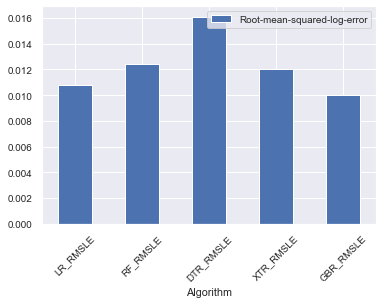

In [164]:
# Bar plot for each of the following root-mean-squared-log-error 
df = pd.DataFrame({'Algorithm':['LR_RMSLE', 'RF_RMSLE', 'DTR_RMSLE', 'XTR_RMSLE', 'GBR_RMSLE'], 'Root-mean-squared-log-error':[0.0108, 0.0124, 0.0161, 0.0120, 0.0100]})
ax = df.plot.bar(x='Algorithm', y='Root-mean-squared-log-error', rot=45)



The above bar plot shows the root-mean-squared-errors for the following algorithms. Gradient boosting gave the best result of 0.127 and the decision tree regressor gave the worst result of 0.191. 

In [165]:
# Hyperparameter tuning for gradient boosting regressor 
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
gbr=GradientBoostingRegressor()
search_grid=[{'n_estimators':[500,1000,2000],'learning_rate':[.001,0.01,.1],'max_depth':[1,2,4],'subsample':[.5,.75,1]}]
search1=GridSearchCV(estimator=gbr,param_grid=search_grid,n_jobs=1,cv=5)
search1.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=GradientBoostingRegressor(alpha=0.9,
                                                 criterion='friedman_mse',
                                                 init=None, learning_rate=0.1,
                                                 loss='ls', max_depth=3,
                                                 max_features=None,
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100,
                                                 n_iter_no_change=None,
                

In [166]:
# Gradient Boosting Regressor after hyperparameter tuning
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_log_error



pred = search1.predict(X_test)
gbr_rmse = np.sqrt(metrics.mean_squared_error(pred, y_test))
r_squared = r2_score(y_test ,pred) 
mean_squared = mean_squared_error(y_test, pred)
root_mean_squared_log_error = np.sqrt(mean_squared_log_error(y_test, pred))

print('Training accuracy:', str(training_accuracy))
print('Root-mean-squared error:', str(gbr_rmse))
print('Root-mean-squared-log-error:', str(root_mean_squared_log_error))
print('Mean-squared-error:', str(mean_squared))
print('R-squared:', str(r_squared))

Training accuracy: 0.947952228094347
Root-mean-squared error: 0.11924170052390301
Root-mean-squared-log-error: 0.009355913564395696
Mean-squared-error: 0.014218583143832172
R-squared: 0.9156560941055718


In [167]:
# Top 20 feature importances 
feature_importances = pd.DataFrame(gradient_boosting_regressor.feature_importances_,index = X_train.columns,columns=['importance']).sort_values('importance',ascending=False)
feature_importances = feature_importances[0:20]
feature_importances

,importance
OverallQual,0.430328
GrLivArea,0.092892
GrLivingArea_zscore,0.092440
GarageArea,0.055616
YearBuilt,0.054756
TotalBsmtSF,0.052267
BsmtFinSF1,0.027402
YearRemodAdd,0.026922
GarageCars,0.024807
LotArea,0.014740


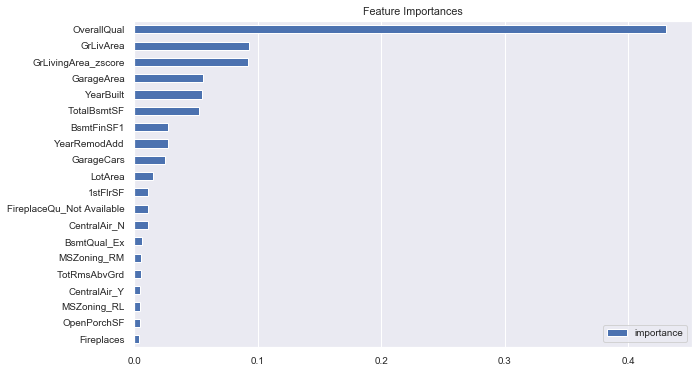

In [168]:
# Bar plot for feature importances 
feature_importances = pd.DataFrame(gradient_boosting_regressor.feature_importances_,index = X_train.columns,columns=['importance']).sort_values('importance',ascending=False)

N = 20
ax = (feature_importances.iloc[0:N][::-1]
    .plot(kind='barh',
          title='Feature Importances',
          figsize=(10, 6)))
ax.grid(False, axis='y')

## Conclusion


The best RMSLE (root-mean-squared-Logarithmic-error) was respectively 0.01002 which was obtained from the Gradient Boosting Regressor. After hyperparameter tuning the Gradient Boosting Regressor model, the RMSLE was 0.00936. 